Support Vectors:
 [[-1.05799413 -1.1887312   0.19160184 ...  1.40527181  0.34733311
  -0.86917786]
 [-0.75060947 -0.85910753 -0.70474729 ...  0.40605399 -0.21498841
  -0.97793826]
 [-0.16273632 -0.244078    1.43059861 ... -0.56458621  1.22848288
  -1.17836393]
 ...
 [ 1.06296     1.05230778  5.55281759 ... -0.40011495  0.29015927
  -0.48070574]
 [ 1.46256005  1.46433737 -0.11963661 ... -0.45047553 -0.68045073
  -0.86917786]
 [ 1.03030038  1.00808998  0.47804823 ...  0.33470983  0.16706736
  -0.76896502]]
Confusion Matrix:
 [[ 77   0   0   1   0   2  34]
 [  1   8   0   1   0   0   4]
 [  0   0 103   0   0   0   5]
 [  5   0   0  21   0   1  19]
 [  0   0   0   0  26   0   1]
 [  1   0   0   0   0  57   4]
 [ 42   1   4   1   1   9 153]]

Classification Report:
               precision    recall  f1-score   support

       Bumps       0.61      0.68      0.64       114
   Dirtiness       0.89      0.57      0.70        14
   K_Scratch       0.96      0.95      0.96       108
      Pastr

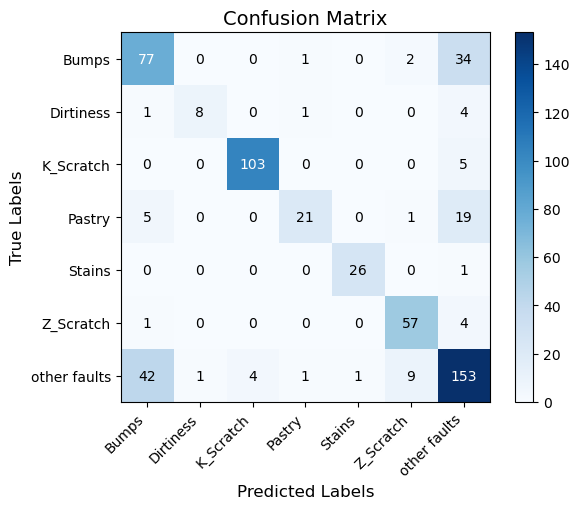

In [ ]:
# Importing libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import scikitplot as skplt
import matplotlib.pyplot as plt



# Loading the dataset
file_path = "faults.xlsx"  
dataset = pd.read_excel(file_path)

# Data Preparation and Feature Scaling
# Combine binary defect columns into a single target variable
defect_columns = ['Pastry', 'Z_Scratch', 'K_Scratch', 'Stains', 'Dirtiness', 'Bumps', 'other faults']
dataset['Defect_Type'] = dataset[defect_columns].idxmax(axis=1)
# Drop the binary defect columns to keep only the unified target variable
data = dataset.drop(columns=defect_columns)
data.sample(10)




# Separate features and target variable
X = data.drop(columns=['Defect_Type'])
y = dataset['Defect_Type']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

##by trial and error, rbf is best as it performs 76 accuracy
model = SVC(kernel='rbf')
model.fit(X_train, y_train)


# Support Vectors
support_vectors = model.support_vectors_
print("Support Vectors:\n", support_vectors)

# Evaluate the model
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output metrics
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

skplt.metrics.plot_confusion_matrix(y_test,y_pred,  normalize=False)
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.show()

Cross-validation scores: [0.59793814 0.81958763 0.80927835 0.80412371 0.78865979 0.79381443
 0.73195876 0.71649485 0.5257732  0.51813472]
Average cross-validation accuracy: 71.06%
Confusion Matrix:
 [[ 77   0   0   1   0   2  34]
 [  1   8   0   1   0   0   4]
 [  0   0 103   0   0   0   5]
 [  5   0   0  21   0   1  19]
 [  0   0   0   0  26   0   1]
 [  1   0   0   0   0  57   4]
 [ 42   1   4   1   1   9 153]]

Classification Report:
               precision    recall  f1-score   support

       Bumps       0.61      0.68      0.64       114
   Dirtiness       0.89      0.57      0.70        14
   K_Scratch       0.96      0.95      0.96       108
      Pastry       0.88      0.46      0.60        46
      Stains       0.96      0.96      0.96        27
   Z_Scratch       0.83      0.92      0.87        62
other faults       0.70      0.73      0.71       211

    accuracy                           0.76       582
   macro avg       0.83      0.75      0.78       582
weighted avg    

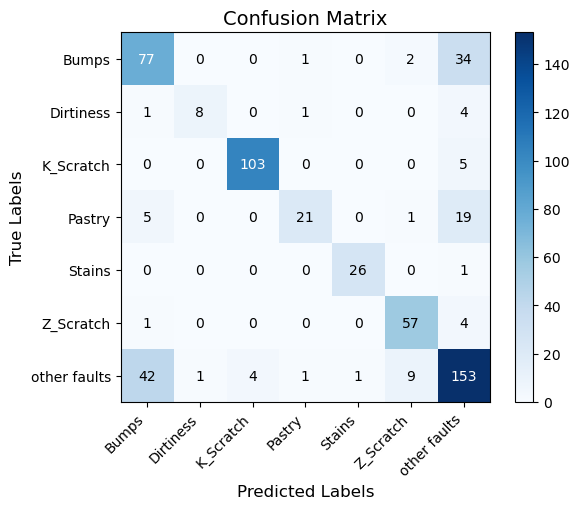

In [ ]:
# Using Cross-Validation
from sklearn.model_selection import train_test_split, cross_val_score


# Perform 10-fold cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=10, scoring='accuracy')

# Print cross-validation results
print("Cross-validation scores:", cv_scores)
print("Average cross-validation accuracy: {:.2f}%".format(cv_scores.mean() * 100))

# Split the data into training and test sets for final evaluation
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train the SVM model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output metrics
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Plot confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.show()
